#SOLAR ENERGY PREDICTION USING WEATHER DATA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
dataframe = pd.read_csv ('spg.csv')

**EDA**

This below script uses statistical analyses, such as the Pearson correlation coefficient and t-test for comparing means, to examine how meteorological attributes (temperature, humidity, cloud cover, wind speed, and radiation) relate to a generated power variable. By calculating correlations, significance levels, and descriptive statistics for each attribute, the script provides a concise understanding of how specific weather conditions impact the generated power. The averaged results offer an overall summary, aiding in the identification of significant meteorological influences on the power generation dataset.

In [6]:
import scipy.stats as stats

attributes = [
    'temperature_2_m_above_gnd',
    'relative_humidity_2_m_above_gnd',
    'total_cloud_cover_sfc',
    'wind_speed_10_m_above_gnd',
    'shortwave_radiation_backwards_sfc'
]

correlation_coefficients = []
p_values = []
t_statistics = []
t_p_values = []
mean_values = []
std_dev_values = []

for attribute in attributes:
    current_attribute = dataframe[attribute]

    # Pearson correlation coefficient
    correlation_coefficient, p_value = stats.pearsonr(current_attribute, dataframe['generated_power_kw'])
    correlation_coefficients.append(correlation_coefficient)
    p_values.append(p_value)

    # T-test for comparing means
    t_statistic, t_p_value = stats.ttest_ind(current_attribute, dataframe['generated_power_kw'])
    t_statistics.append(t_statistic)
    t_p_values.append(t_p_value)

    # Descriptive statistics
    mean_value = current_attribute.mean()
    std_dev_value = current_attribute.std()
    mean_values.append(mean_value)
    std_dev_values.append(std_dev_value)

    print(f"\nResults for {attribute}:")
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}, p-value: {p_value:.4f}")
    print(f"T-test: t-statistic: {t_statistic:.4f}, p-value: {t_p_value:.4f}")
    print(f"Descriptive Statistics:")
    print(f"   - Mean {attribute}: {mean_value:.4f}")
    print(f"   - Standard Deviation {attribute}: {std_dev_value:.4f}")

average_correlation = sum(correlation_coefficients) / len(correlation_coefficients)
average_p_value = sum(p_values) / len(p_values)
print(f"\nAverage Pearson Correlation Coefficient: {average_correlation:.4f}")
print(f"Average p-value: {average_p_value:.4f}")



Results for temperature_2_m_above_gnd:
Pearson Correlation Coefficient: 0.2173, p-value: 0.0000
T-test: t-statistic: -77.4518, p-value: 0.0000
Descriptive Statistics:
   - Mean temperature_2_m_above_gnd: 15.0681
   - Standard Deviation temperature_2_m_above_gnd: 8.8537

Results for relative_humidity_2_m_above_gnd:
Pearson Correlation Coefficient: -0.3368, p-value: 0.0000
T-test: t-statistic: -74.9202, p-value: 0.0000
Descriptive Statistics:
   - Mean relative_humidity_2_m_above_gnd: 51.3610
   - Standard Deviation relative_humidity_2_m_above_gnd: 23.5259

Results for total_cloud_cover_sfc:
Pearson Correlation Coefficient: -0.3343, p-value: 0.0000
T-test: t-statistic: -76.0619, p-value: 0.0000
Descriptive Statistics:
   - Mean total_cloud_cover_sfc: 34.0570
   - Standard Deviation total_cloud_cover_sfc: 42.8436

Results for wind_speed_10_m_above_gnd:
Pearson Correlation Coefficient: -0.0830, p-value: 0.0000
T-test: t-statistic: -77.3707, p-value: 0.0000
Descriptive Statistics:
   - Mea

The average Pearson correlation coefficient across all attributes is 0.0039, indicating a very weak overall linear relationship.
However, considering the individual attributes, shortwave radiation stands out as a particularly influential factor in solar power generation, demonstrating a strong positive correlation. Other factors such as temperature, relative humidity, cloud cover, and wind speed also show significant associations, contributing to a nuanced understanding of their impact on the system. The consistently low p-values underscore the statistical significance of these findings.

**Visualization: Scatter Plot**

In this **scatter plot analysis**, we examine the interplay between temperature, cloud cover, and generated power. Each point on the plot corresponds to a specific temperature value, with color indicating the level of cloud cover. By visualizing these relationships, we can quickly discern patterns and potential correlations. The scatter plot includes a regression line to highlight trends in how temperature and cloud cover impact the amount of power generated. This graphical representation is essential for intuitively grasping the influence of these attributes on the efficiency of a solar energy system. The simplicity of the scatter plot allows for a straightforward interpretation of the connections between temperature, cloud cover, and power generation, providing a solid foundation for further analysis.

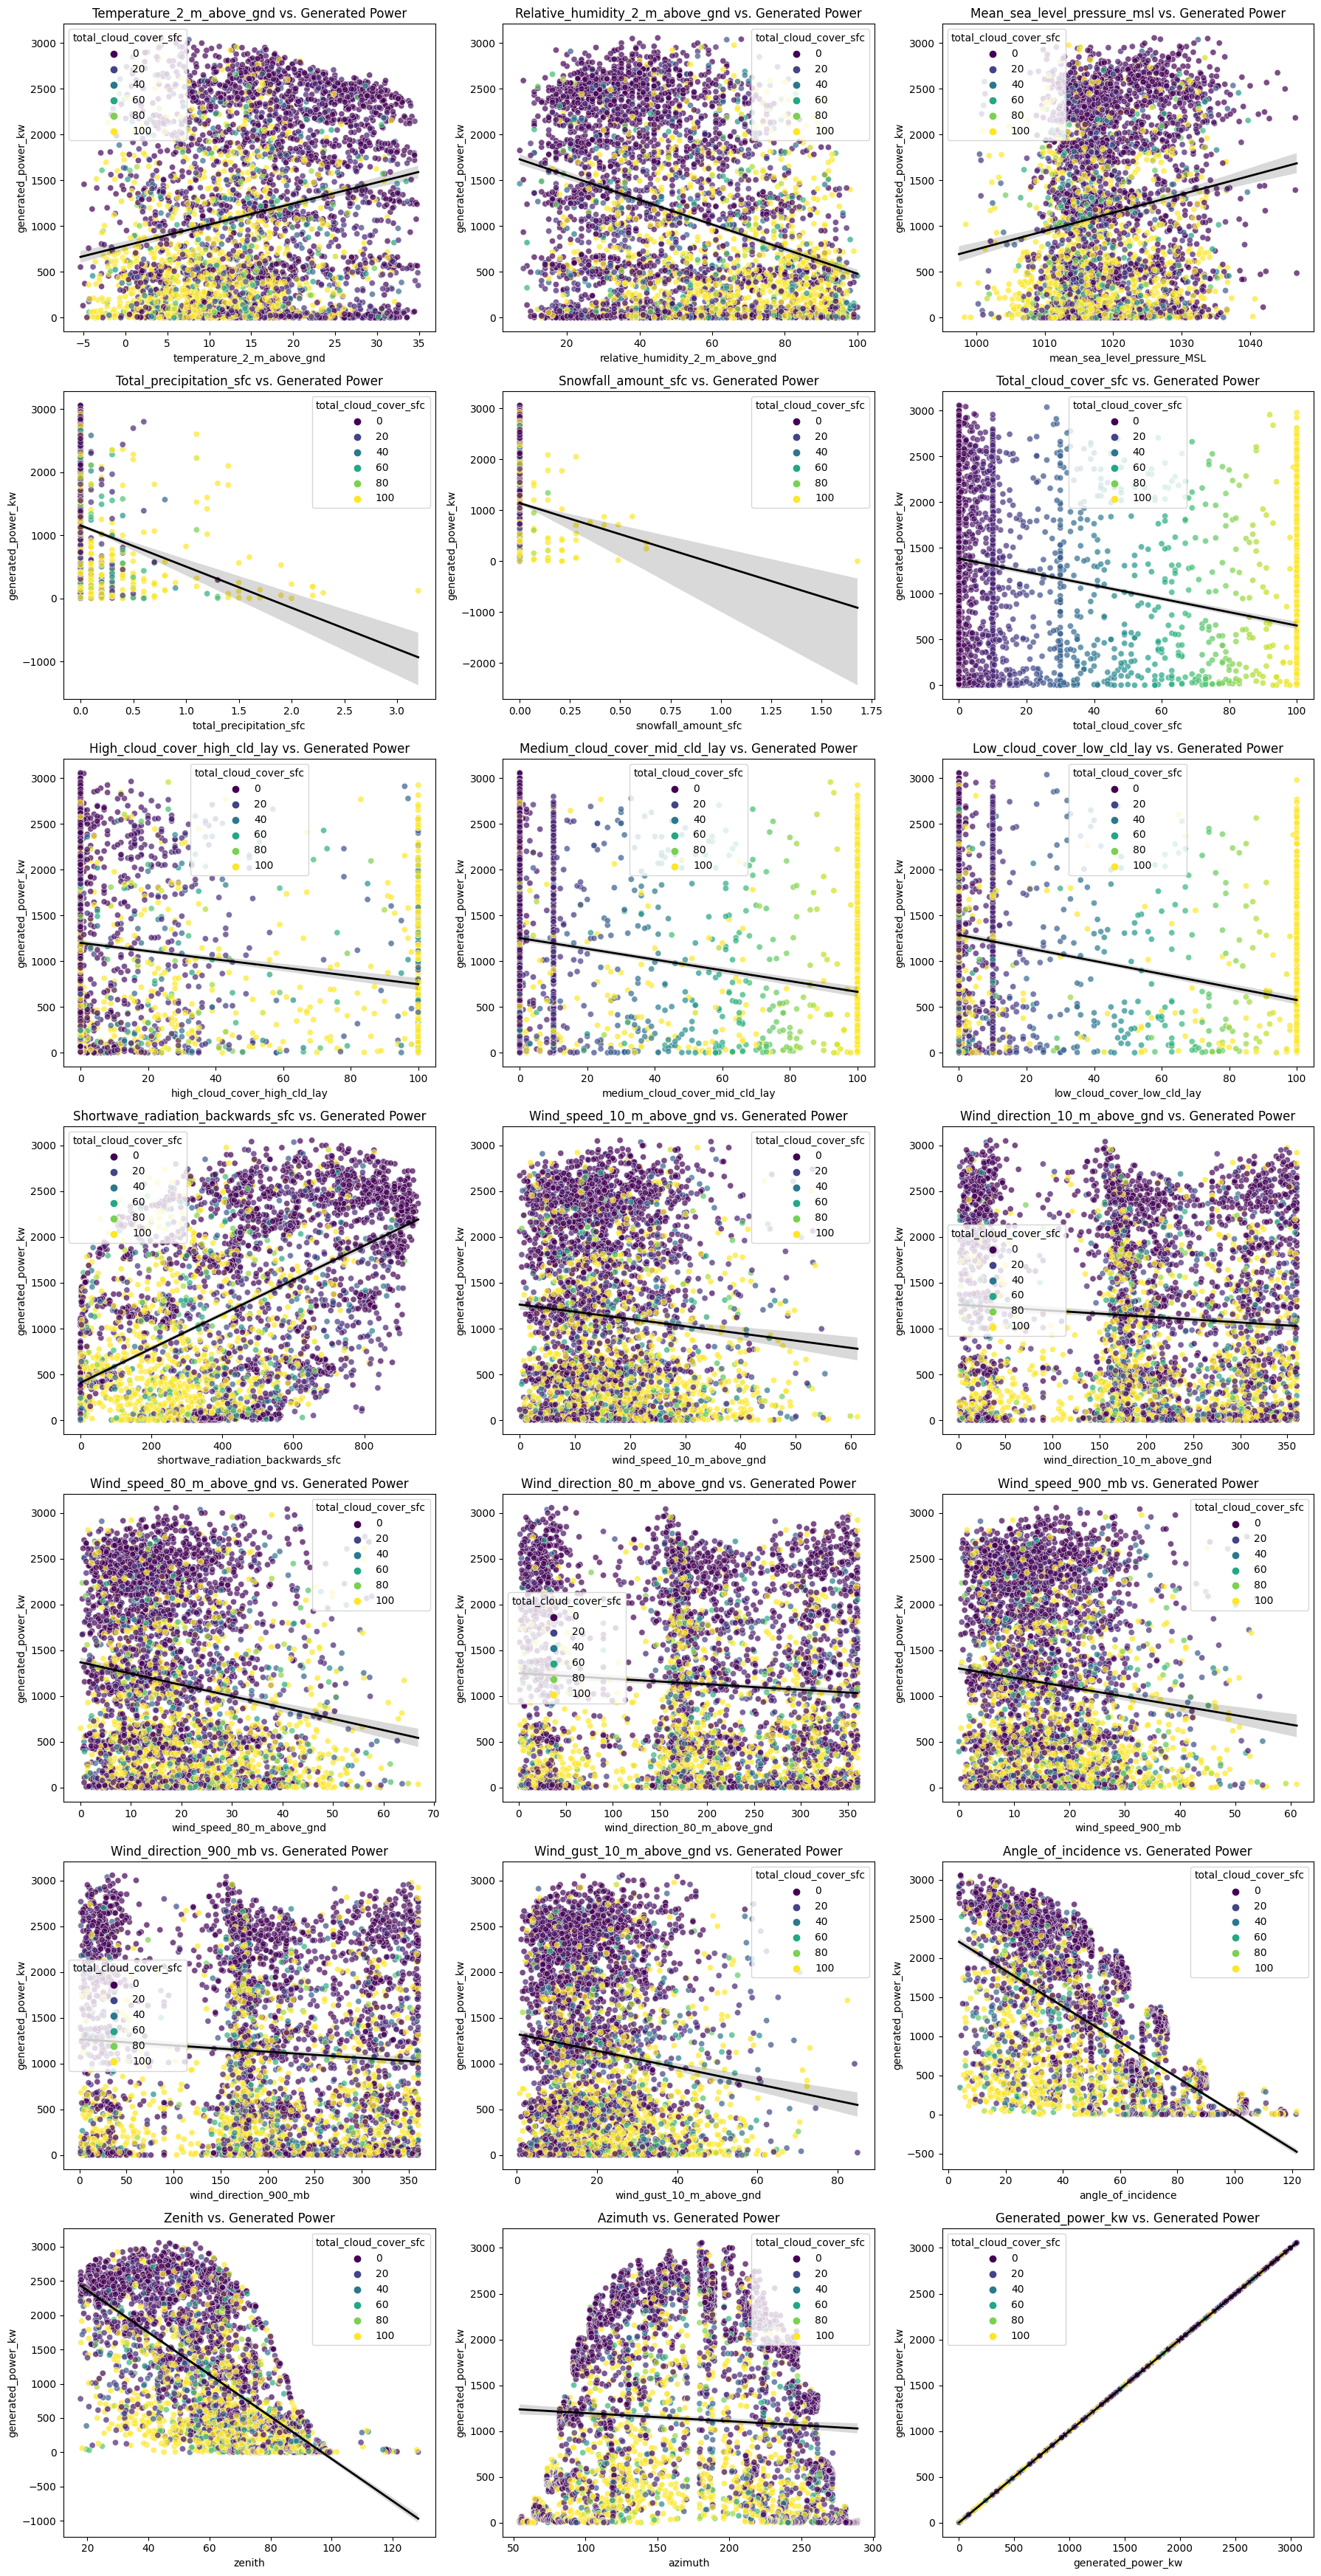

In [8]:
colors = sns.color_palette('viridis', as_cmap=True)
attributes_to_plot = [col for col in dataframe.columns]
num_attributes = len(attributes_to_plot)
num_cols = 3
num_rows = -(-num_attributes // num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

legend_dict = {}

for i, attribute in enumerate(attributes_to_plot):
    scatter = sns.scatterplot(
        x=attribute,
        y='generated_power_kw',
        hue='total_cloud_cover_sfc',
        palette=colors,
        data=dataframe,
        alpha=0.7,
        ax=axes[i],
        s=35
    )

    sns.regplot(
        x=attribute,
        y='generated_power_kw',
        data=dataframe,
        scatter=False,
        color='black',
        line_kws={'linewidth': 2},
        ax=axes[i]
    )
    axes[i].set_title(f'{attribute.capitalize()} vs. Generated Power')
    handles, labels = scatter.get_legend_handles_labels()
    legend_dict.update(dict(zip(labels, handles)))

plt.tight_layout()
plt.show()

**In conclusion**, the positive slope of the regression line in our scatter plot reveals a clear positive correlation between temperature and generated power. This suggests that as temperature increases, the system's power generation tends to rise. The visual representation of this relationship underscores the importance of considering temperature as a significant factor in optimizing solar power systems. The positive correlation aligns with expectations, as higher temperatures generally enhance the efficiency of solar panels. Understanding and leveraging this positive relationship between temperature and generated power can inform better operational strategies and contribute to the overall efficiency and effectiveness of the solar energy system.

**Correlation Coefficient** is a measure of the linear relationship between the temperature and generated power in our dataset.

Here's a detailed interpretation:

**Correlation Coefficient Value:**
The correlation coefficient ranges from -1 to 1. A value of 0 indicates no linear correlation, a value of 1 indicates a perfect positive linear correlation, and a value of -1 indicates a perfect negative linear correlation.

In summary, understanding these correlations aids in identifying key factors influencing power generation, providing insights for system optimization and operational planning

In [9]:
correlations = dataframe.corr()['generated_power_kw']

Corre_coeff_Desc = correlations.drop('generated_power_kw').sort_values(ascending=False)

print("Correlation Coefficients (Descending Order):")
for attribute, correlation in Corre_coeff_Desc.items():
    print(f"{attribute.capitalize()} vs. Power: {correlation:.4f}")

Correlation Coefficients (Descending Order):
Shortwave_radiation_backwards_sfc vs. Power: 0.5561
Temperature_2_m_above_gnd vs. Power: 0.2173
Mean_sea_level_pressure_msl vs. Power: 0.1506
Snowfall_amount_sfc vs. Power: -0.0495
Azimuth vs. Power: -0.0612
Wind_direction_80_m_above_gnd vs. Power: -0.0699
Wind_direction_10_m_above_gnd vs. Power: -0.0733
Wind_direction_900_mb vs. Power: -0.0774
Wind_speed_10_m_above_gnd vs. Power: -0.0830
Wind_speed_900_mb vs. Power: -0.1076
Total_precipitation_sfc vs. Power: -0.1184
Wind_gust_10_m_above_gnd vs. Power: -0.1228
High_cloud_cover_high_cld_lay vs. Power: -0.1477
Wind_speed_80_m_above_gnd vs. Power: -0.1579
Medium_cloud_cover_mid_cld_lay vs. Power: -0.2278
Low_cloud_cover_low_cld_lay vs. Power: -0.2881
Total_cloud_cover_sfc vs. Power: -0.3343
Relative_humidity_2_m_above_gnd vs. Power: -0.3368
Angle_of_incidence vs. Power: -0.6465
Zenith vs. Power: -0.6500


**Conclusion:**

**Most Important Factor:** Among the attributes considered, the correlation coefficients indicate that shortwave radiation (incoming solar radiation) has the highest positive correlation with power generation (0.5561). This suggests that the availability of sunlight significantly influences the amount of power generated in the solar energy system.

**Additional Insights:**
While temperature also shows a positive correlation, it is weaker (0.2173) compared to shortwave radiation.
Total cloud cover exhibits a moderate negative correlation, highlighting the impact of clouds on reducing power output.
Wind speed has a very weak negative correlation, suggesting minimal influence on power generation in this context.

**System Optimization:** To optimize power generation in a solar energy system, it's crucial to prioritize factors that maximize shortwave radiation exposure, such as minimizing cloud cover and ensuring proper orientation of solar panels to capture sunlight effectively.

**Considerations for Decision-Making:** When making decisions related to power generation, focusing on maximizing exposure to sunlight and minimizing factors that reduce solar radiation could lead to improved system performance.